# Dask Examples

### Author: Shachi Kaul   
    
### Notebook Description

- The notebook highlights the basis applications of Dask by consuming its High-level and low-level APIs.
- Analogy between the performance of pandas and dask dataframe 
- For Dask dataframe, data is referred from [here](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset)

In [1]:
import pandas as pd
import numpy as np
import time
import dask

# High-Level APIs

 ## Dask Dataframes

In [2]:
from dask import dataframe 

In [3]:
df = dataframe.read_csv("heart_disease.csv")

In [4]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
npartitions=1,,,,,,,,,,,,,,,,
,int64,int64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


#### Convert pandas to dask dataframe with cutomization of partitions

In [5]:
pd_df = pd.read_csv("heart_disease.csv")

In [6]:
ddf = dataframe.from_pandas(pd_df, npartitions=3)

#### Dask dataframe is lazy and so no data is printed unless explicitly requested.

In [7]:
df.compute()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


#### Operations like used to perform on pandas can be performed on Dask too

- For eg, taking mean of Age column

In [8]:
df.iloc[:,1].mean()

dd.Scalar<series-..., dtype=float64>

In [9]:
df.iloc[:,1].mean().compute()

49.58018867924528

- Groupby calculations on dataframe

In [10]:
df.groupby(['male']).cigsPerDay.mean().compute()

male
0     5.729730
1    13.368771
Name: cigsPerDay, dtype: float64

## Dask Arrays

In [11]:
from dask import array

#### Analogy between numpy and dask array by generting random intetgers of 10,000 arrays
Conclusion: Dask array performed faster than numpy arrays

In [12]:
%%time
x = array.random.random((10000, 10000), chunks=(1000, 1000))

Wall time: 4 ms


In [13]:
%%time
x = np.random.random((10000, 10000))
x

Wall time: 1.57 s


# Low-Level APIs

Let's create two functions of adding and subtracting passed ineteger by 2 followed by a function comparing larger integer returned from those functions. Resulted integer then passed onto another function and returns a double of it

In [27]:
def inc_integer(x):
    return x+2

def sub_integer(x):
    return x-2

def compare_integer(x,y):
    if x>y:
        return x
    else:
        return y
    
def double_larger_integer(n):
    return n**2

Normal function call gives an immediate result

In [28]:
inc = inc_integer(10)
sub =sub_integer(20)
larger_no = compare_integer(inc, sub)
double_larger_integer(larger_no)

324

## Dask Delayed

Wrapping up dask.delayed around a function makes that function lazy in nature

In [29]:
inc = dask.delayed(inc_integer)(10)
sub = dask.delayed(sub_integer)(20)
larger_no = dask.delayed(compare_integer)(inc,sub)
dd_obj = dask.delayed(double_larger_integer)(larger_no)

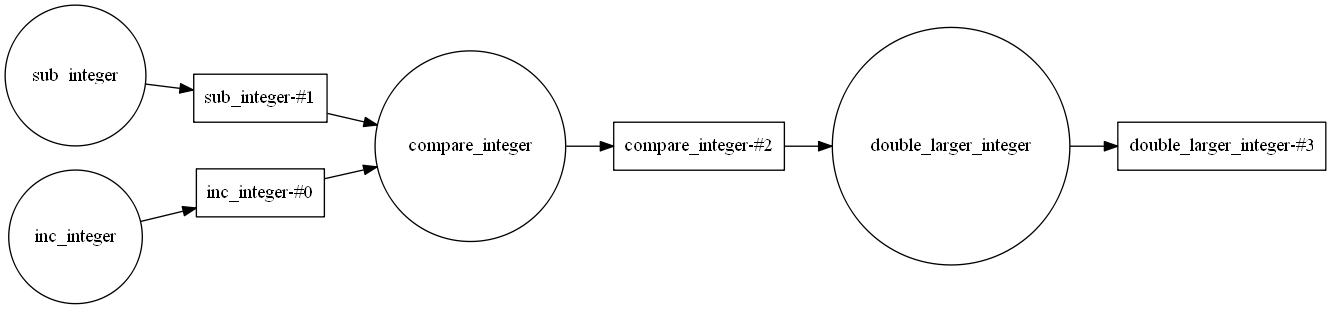

In [30]:
dd_obj.visualize(rankdir='LR')

Invoke compute() to show up the results

In [31]:
dd_obj.compute()

324

## Dask Futures

In [32]:
from dask.distributed import Client, progress

In [35]:
client = Client(n_workers=1)
client

D:\Users\SKaul7\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\bokeh\core.py:55: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:55143 Dashboard: http://127.0.0.1:55146/status,Cluster Workers: 2 Cores: 2 Memory: 8.59 GB


In [37]:
inc = client.submit(inc_integer, 10)  # returns immediately with pending future
inc

<Future: status: finished, type: int, key: inc_integer-212ff444ef1ec4e21c32e25923990a0f>

In [43]:
sub = client.submit(sub_integer,20)
larger_no = client.submit(compare_integer,inc,sub)
future_obj = client.submit(double_larger_integer,larger_no)

In [44]:
future_obj

<Future: status: finished, type: int, key: double_larger_integer-3bff5c3434d975be302187600348330c>

In [45]:
future_obj.result()

324

# END